In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import numpy.linalg as la
import sympy as sy
from scipy.integrate import odeint

In [2]:
wk,w0,x1,x2,x3=sy.symbols("\omega_k , \omega_0,x1,x2,x3")

In [3]:
g=9.81
m=1
l=9.81
w0=g/l #wo^2
wk


\omega_k

In [4]:
def c1 (x):
    
    return (3*w0-x)/(2*w0)


def c2 (x):
    
    return (-6 + x/w0 +3*w0/x)

###alpha 1, alpha 2, alpha 3 = 0

def theta1(t,A1,A2,A3):
    
    return A1*np.cos(np.sqrt(w1)*t+0) + A2*np.cos(np.sqrt(w2)*t+0) + A3*np.cos(np.sqrt(w3)*t+0)

def theta2(t,A1,A2,A3):
    
    return c1(w1)*A1*np.cos(np.sqrt(w1)*t+0) + c1(w2)*A2*np.cos(np.sqrt(w2)*t+0) + c1(w3)*A3*np.cos(np.sqrt(w3)*t+0)

def theta3(t,A1,A2,A3):
    
    return c2(w1)*A1*np.cos(np.sqrt(w1)*t+0) + c2(w2)*A2*np.cos(np.sqrt(w2)*t+0) + c2(w3)*A3*np.cos(np.sqrt(w3)*t+0)

In [5]:
M=sy.Matrix([[-3*wk**2 + 3*w0**2, -2*wk**2, -wk**2], [-2*wk**2, -2*wk**2 + 2*w0**2, -wk**2], [-wk**2, -wk**2, -wk**2 + w0**2]]);M

Matrix([
[3.0 - 3*\omega_k**2,      -2*\omega_k**2,      -\omega_k**2],
[     -2*\omega_k**2, 2.0 - 2*\omega_k**2,      -\omega_k**2],
[       -\omega_k**2,        -\omega_k**2, 1.0 - \omega_k**2]])

In [6]:
N=M.det();N

-\omega_k**6 + 9.0*\omega_k**4 - 18.0*\omega_k**2 + 6.0

In [7]:
def frekv (x):
    
    return -x**3 + 9*x**2 - 18*x + 6

In [8]:
w1=root(frekv, 1).x[0];w1  ##w^2_1

np.float64(0.4157745567834797)

In [9]:
w2=root(frekv,2).x[0];w2   ##w^2_2

np.float64(2.2942803602790405)

In [10]:
w3=root(frekv,6).x[0];w3   ##w^2_3

np.float64(6.289945082937479)

In [11]:
omega0=np.sqrt(g/l)
a=0.1

In [12]:
def func(y,t):
    x1=y[0]
    vx1=y[1]
    x2=y[2]
    vx2=y[3]
    x3=y[4]
    vx3=y[5]    
    ax1=-3*omega0**2 *x1 + 2*omega0**2 *x2
    ax2=3*omega0**2 *x1 - 4*omega0**2 *x2 + omega0**2 *x3
    ax3=2*omega0**2 *x2 - 2*omega0**2 *x3
    return[vx1,ax1,vx2,ax2,vx3,ax3]

# Mode 1:

In [13]:
Tmax=5*2*np.pi/omega0
dt=Tmax/500
t=np.arange(0.0,Tmax,dt) 
y0=[a,0.0,c1(w1)*a,0.0,c2(w1)*a,0.0]
y=odeint(func,y0,t) 

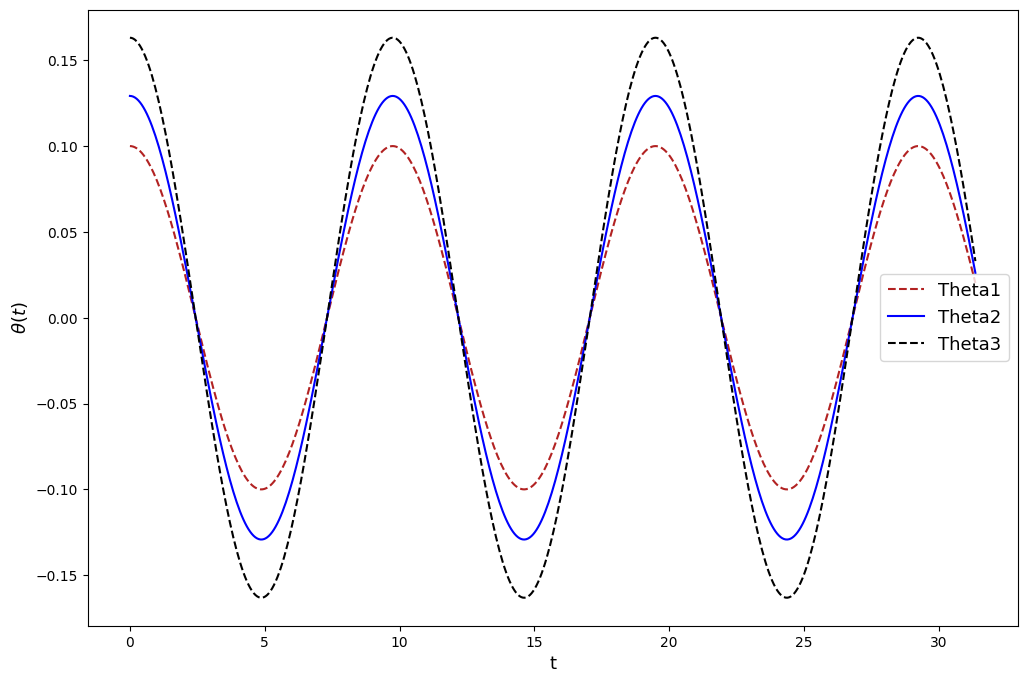

In [14]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(t,y[:,0],color='firebrick',ls='--',lw=1.5,label='Theta1')  #Theta1
plt.plot(t,y[:,2],color='blue',ls='-',lw=1.5,label='Theta2')      #Theta2
plt.plot(t,y[:,4],color='black',ls='--',lw=1.5,label='Theta3')  #Theta3
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$\theta (t)$',fontsize='13')
plt.legend(fontsize=13,loc='right')

# Mode 2:

In [15]:
Tmax=5*2*np.pi/omega0
dt=Tmax/500
t=np.arange(0.0,Tmax,dt) 
y0=[a,0.0,c1(w2)*a,0.0,c2(w2)*a,0.0]
y=odeint(func,y0,t) 

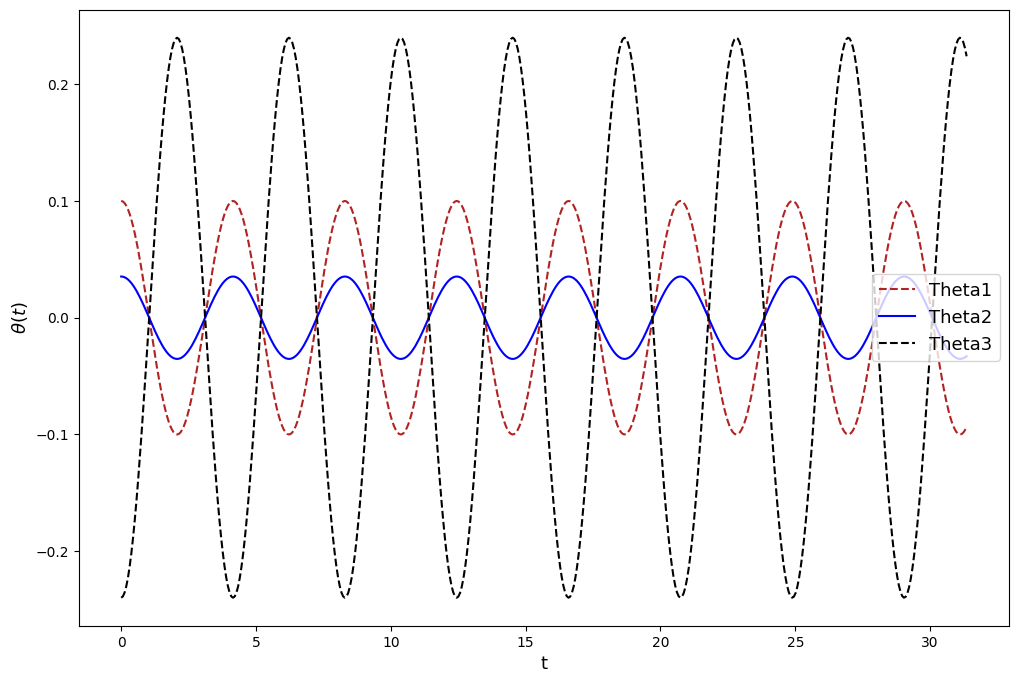

In [16]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(t,y[:,0],color='firebrick',ls='--',lw=1.5,label='Theta1')  #Theta1
plt.plot(t,y[:,2],color='blue',ls='-',lw=1.5,label='Theta2')      #Theta2
plt.plot(t,y[:,4],color='black',ls='--',lw=1.5,label='Theta3')  #Theta3
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$\theta (t)$',fontsize='13')
plt.legend(fontsize=13,loc='right')

# Mode 3:

In [17]:
Tmax=5*2*np.pi/omega0
dt=Tmax/500
t=np.arange(0.0,Tmax,dt) 
y0=[a,0.0,c1(w3)*a,0.0,c2(w3)*a,0.0]
y=odeint(func,y0,t) 

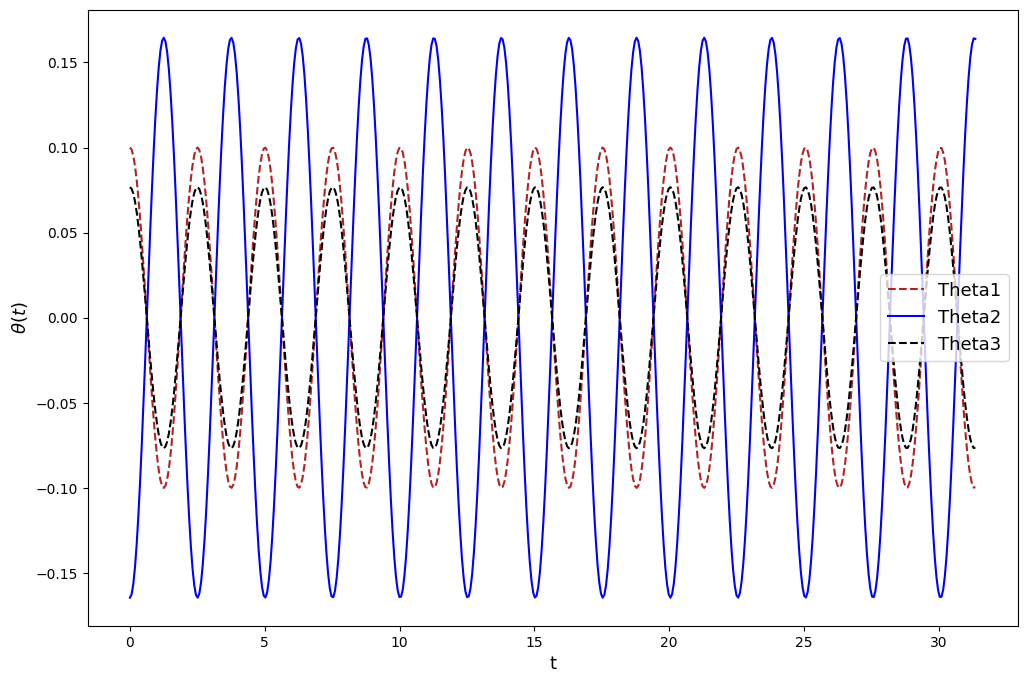

In [18]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(t,y[:,0],color='firebrick',ls='--',lw=1.5,label='Theta1')  #Theta1
plt.plot(t,y[:,2],color='blue',ls='-',lw=1.5,label='Theta2')      #Theta2
plt.plot(t,y[:,4],color='black',ls='--',lw=1.5,label='Theta3')  #Theta3
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$\theta (t)$',fontsize='13')
plt.legend(fontsize=13,loc='right')


# Only mode 1 is active

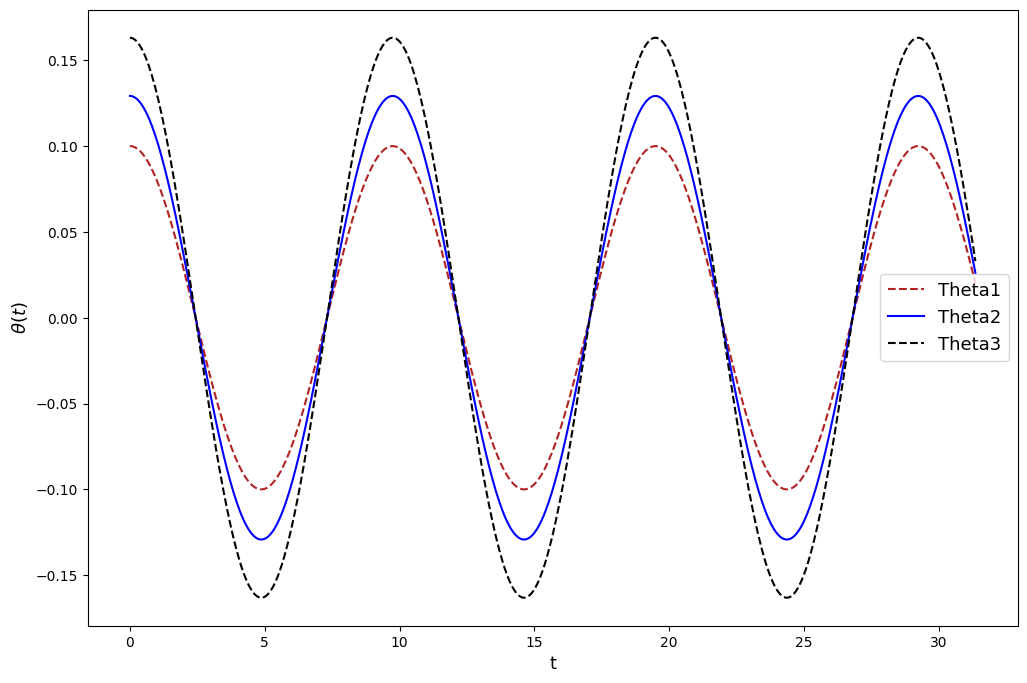

In [19]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(t,theta1(t,0.1,0,0),color='firebrick',ls='--',lw=1.5,label='Theta1')  #Theta1
plt.plot(t,theta2(t,0.1,0,0),color='blue',ls='-',lw=1.5,label='Theta2')      #Theta2
plt.plot(t,theta3(t,0.1,0,0),color='black',ls='--',lw=1.5,label='Theta3')  #Theta3
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$\theta (t)$',fontsize='13')
plt.legend(fontsize=13,loc='right')

# Modes 1 and 2 are active:

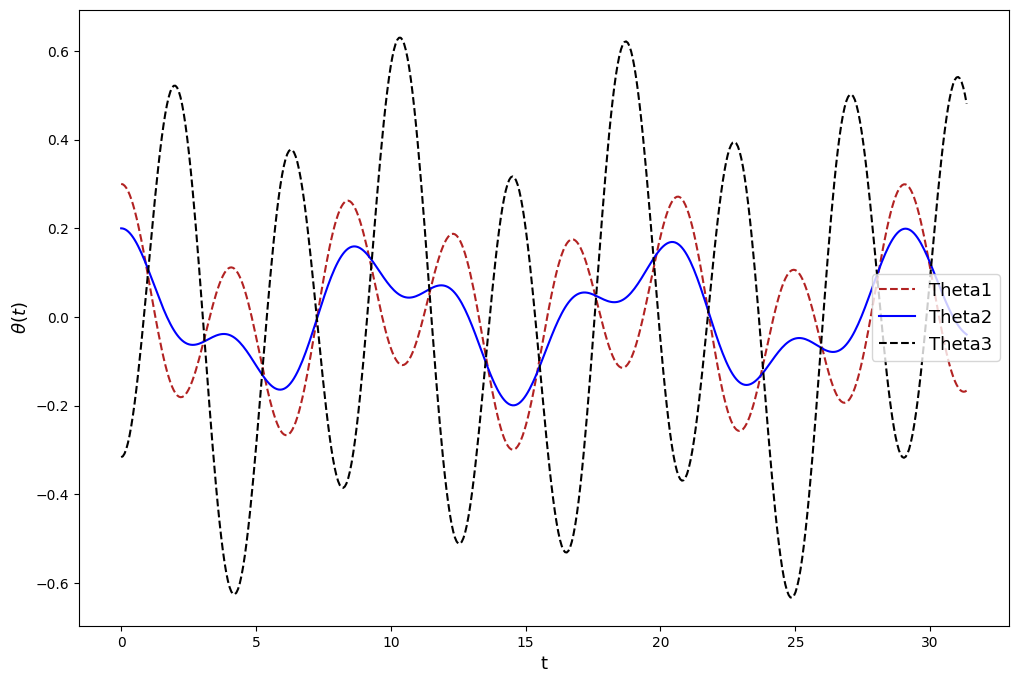

In [20]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(t,theta1(t,0.1,0.2,0),color='firebrick',ls='--',lw=1.5,label='Theta1')  #Theta1
plt.plot(t,theta2(t,0.1,0.2,0),color='blue',ls='-',lw=1.5,label='Theta2')      #Theta2
plt.plot(t,theta3(t,0.1,0.2,0),color='black',ls='--',lw=1.5,label='Theta3')  #Theta3
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$\theta (t)$',fontsize='13')
plt.legend(fontsize=13,loc='right')

# All three modes are active:

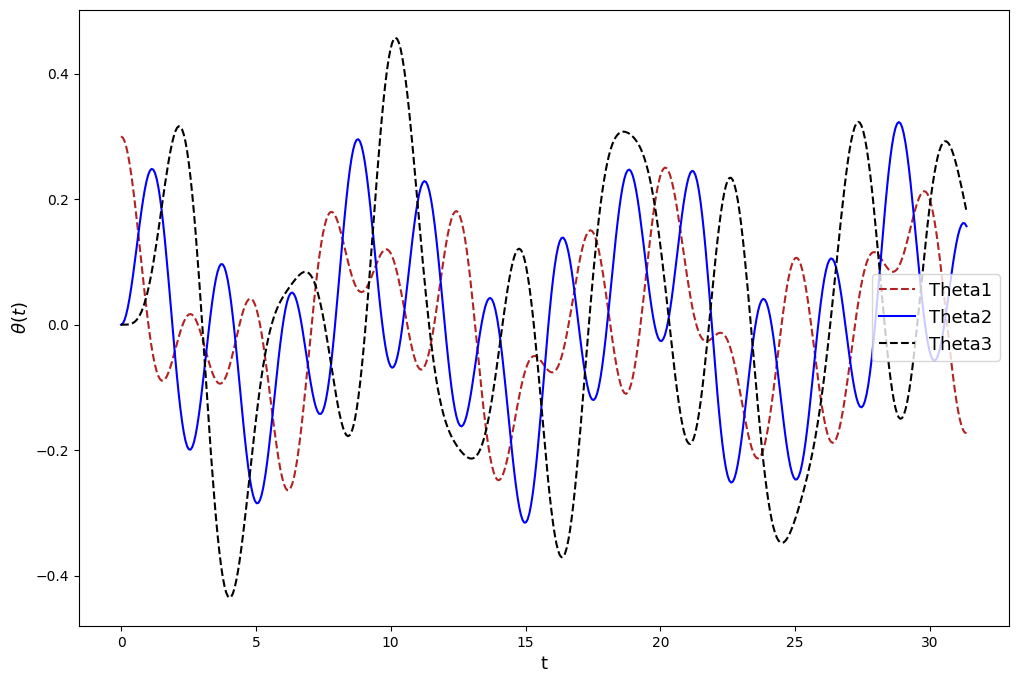

In [21]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(t,theta1(t,0.1,0.1,0.1),color='firebrick',ls='--',lw=1.5,label='Theta1')  #Theta1
plt.plot(t,theta2(t,0.1,0.1,0.1),color='blue',ls='-',lw=1.5,label='Theta2')      #Theta2
plt.plot(t,theta3(t,0.1,0.1,0.1),color='black',ls='--',lw=1.5,label='Theta3')  #Theta3
plt.xlabel('t',fontsize='13') 
plt.ylabel(r'$\theta (t)$',fontsize='13')
plt.legend(fontsize=13,loc='right')